In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
human_dna = pd.read_table('human.txt')
chimp_dna = pd.read_table('chimpanzee.txt')
dog_dna = pd.read_table('dog.txt')

In [3]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

In [4]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_human = human_dna.iloc[:, 0].values

chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chim = chimp_dna.iloc[:, 0].values

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_dna.iloc[:, 0].values

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_human, test_size = 0.20, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000)

In [8]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [9]:
y_pred = model.predict(X_test)

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          91    0   0    1    1   0    9
1           0  100   0    2    0   0    4
2           0    0  73    0    0   0    5
3           0    0   0  117    0   0    8
4           0    0   0    1  136   0   12
5           0    0   0    1    0  46    4
6           0    0   0    0    0   0  265
accuracy = 0.945 
precision = 0.952 
recall = 0.945 
f1 = 0.946
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       102
           1       1.00      0.94      0.97       106
           2       1.00      0.94      0.97        78
           3       0.96      0.94      0.95       125
           4       0.99      0.91      0.95       149
           5       1.00      0.90      0.95        51
           6       0.86      1.00      0.93       265

    accuracy                           0.95       876
   macro 

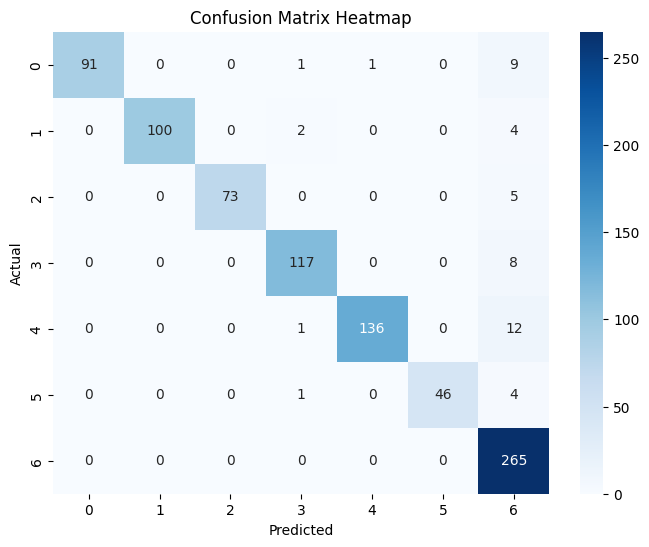

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [11]:
y_pred_chimp = model.predict(X_chimp)

Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          228    0    0    1    0    0    5
1            0  185    0    0    0    0    0
2            0    0  143    0    0    0    1
3            0    0    0  226    0    0    2
4            0    0    0    3  254    0    4
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.990 
precision = 0.991 
recall = 0.990 
f1 = 0.990
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       234
           1       1.00      1.00      1.00       185
           2       1.00      0.99      1.00       144
           3       0.98      0.99      0.99       228
           4       1.00      0.97      0.99       261
           5       1.00      1.00      1.00       109
           6       0.98      1.00      0.99       521

    accuracy                   

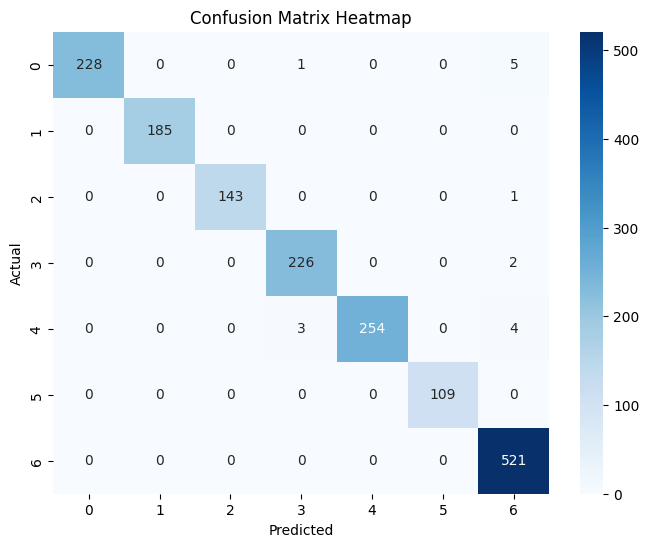

In [12]:
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print(classification_report(y_chim, y_pred_chimp))
cf_matrix = confusion_matrix(y_chim, y_pred_chimp)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [13]:
y_pred_dog = model.predict(X_dog)

Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          116   0   0   0    4   0   11
1            0  69   0   1    1   0    4
2            0   0  51   0    3   0   10
3            0   0   0  88    0   0    7
4            0   0   0   1  119   0   15
5            0   1   0   0    2  51    6
6            0   0   0   0    0   0  260
accuracy = 0.920 
precision = 0.930 
recall = 0.920 
f1 = 0.920
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       131
           1       0.99      0.92      0.95        75
           2       1.00      0.80      0.89        64
           3       0.98      0.93      0.95        95
           4       0.92      0.88      0.90       135
           5       1.00      0.85      0.92        60
           6       0.83      1.00      0.91       260

    accuracy                           0.92       820
   macro avg       0

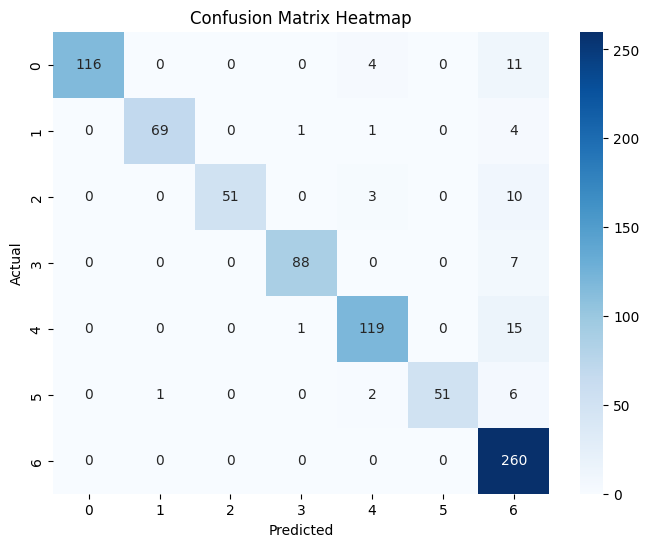

In [14]:
print("Confusion matrix for predictions on Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print(classification_report(y_dog, y_pred_dog))
cf_matrix = confusion_matrix(y_dog, y_pred_dog)
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()